<a href="https://colab.research.google.com/github/DonDigidon9/hate_programming/blob/master/ml_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv('/content/credit-c61fbdb3-e0af-4b7b-9301-6ba7a994eeca.csv')

ОБРАБОТКА DF

In [209]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['колонка_17'])
df['колонка_17'] = label_encoder.transform(df['колонка_17'])

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['колонка_10'])
df['колонка_10'] = label_encoder.transform(df['колонка_10'])

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['колонка_1'])
df['колонка_1'] = label_encoder.transform(df['колонка_1'])

In [210]:
data = df
data['колонка_0'] = pd.to_datetime(data['колонка_0'], format='%Y-%m-%d')
# Получаем текущую дату
today = datetime.today()
# Вычисляем количество дней от каждой даты до сегодняшнего дня
df['approve_dttm'] = (today - data['колонка_0']).dt.days


data['колонка_3'] = pd.to_datetime(data['колонка_3'], format='%Y-%m-%d')
# Получаем текущую дату
today = datetime.today()
# Вычисляем количество дней от каждой даты до сегодняшнего дня
df['util_dttm'] = (today - data['колонка_3']).dt.days


data['колонка_20'] = pd.to_datetime(data['колонка_20'], format='%Y-%m-%d')
# Получаем текущую дату
today = datetime.today()
# Вычисляем количество дней от каждой даты до сегодняшнего дня
df['create_dttm'] = (today - data['колонка_20']).dt.days

In [211]:
df.rename(columns = {'колонка_1':'utm_source', 'колонка_2':'speciality', 'колонка_4':'semester_cost_amt', 'колонка_5':'pid', 'колонка_6':'score', 'колонка_7':'approve_flag', 'колонка_8':'util_flag', 'колонка_9':'initial_term', 'колонка_10':'short_nm', 'колонка_11':'initial_approved_amt', 'колонка_12':'reject_reason', 'колонка_13':'gender_cd', 'колонка_14':'semestr_cnt', 'колонка_15':'name', 'колонка_16':'marketing_flag', 'колонка_17':'education_level_code', 'колонка_18':'age', 'колонка_19':'subside_rate'}, inplace = True)
df.value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,count
колонка_0,utm_source,speciality,колонка_3,semester_cost_amt,pid,score,approve_flag,util_flag,initial_term,short_nm,initial_approved_amt,reject_reason,gender_cd,semestr_cnt,name,marketing_flag,education_level_code,age,subside_rate,колонка_20,approve_dttm,util_dttm,create_dttm,


In [212]:
df = df.drop(['колонка_0', 'колонка_3', 'колонка_20'], axis=1)

In [213]:
df['reject_reason'] = df['reject_reason'].where(df['reject_reason'].isna(), 0)
df['reject_reason'] = df['reject_reason'].fillna(1)

<ipython-input-213-e7fc0a078b69>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['reject_reason'] = df['reject_reason'].fillna(1)


In [214]:
df['approve_dttm'] = df['approve_dttm'].fillna(10000)
df['util_dttm'] = df['util_dttm'].fillna(10000)

In [75]:
df.to_excel('/content/df_1step.xlsx', index=False)

KeyboardInterrupt: 

ОБРАБОТКА ПЕРЕД ЛИНЕЙНОЙ РЕГРЕССИЕЙ

In [215]:
df

,utm_source,speciality,semester_cost_amt,pid,score,approve_flag,util_flag,initial_term,short_nm,initial_approved_amt,...,gender_cd,semestr_cnt,name,marketing_flag,education_level_code,age,subside_rate,approve_dttm,util_dttm,create_dttm
0,2,Электроника и наноэлектроника,180000,75c824cf-b0a1-4151-8b03-ced3be323e22,0.83,0,0,2,11,0.0,...,M,4,Вениамин Георгиевич Шарапов,0,0,16,3.2,10000.0,10000.0,95
1,2,Автоматизация и управление,270000,c808c3f9-e770-4744-a9c7-153e606a696b,0.78,0,0,3,3,0.0,...,F,8,тов. Куликова Наталья Владимировна,0,0,17,3.3,10000.0,10000.0,99
2,1,Информатика и вычислительная техника,245000,46774c65-b983-4ffd-ad3b-a9f0fbc6cc5,0.65,1,1,4,12,1960000.0,...,M,8,Евгений Аверьянович Михайлов,1,0,19,3.9,106.0,61.0,139
3,2,Прикладная математика,200000,5f324ac9-99de-473d-815f-b9162957d623,0.65,1,1,2,4,900000.0,...,F,6,Смирнова Евдокия Вячеславовна,0,0,19,3.6,152.0,67.0,171
4,2,Электроника и наноэлектроника,290000,6edb3ca1-16c7-4a23-aa81-eff2b3e699a6,0.68,0,1,1,3,580000.0,...,F,2,Кира Степановна Цветкова,0,0,16,3.4,91.0,10000.0,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7971,1,Информатика и вычислительная техника,450000,a5dd335d-b656-4c66-af84-8eb96b32ed00,0.65,0,1,4,10,3600000.0,...,M,8,Виктор Венедиктович Корнилов,0,0,18,3.6,154.0,10000.0,172
7972,1,Автоматизация и управление,280000,ca7a0f17-dec1-4063-8ac8-d2e81a0e9f6,0.72,1,1,1,9,560000.0,...,F,4,г-жа Иванова Агата Анатольевна,1,1,24,4.0,149.0,114.0,174
7973,1,Прикладная математика,400000,8ed849b8-73dd-4e9c-ae2d-654edf373f57,0.62,1,1,1,5,800000.0,...,M,2,Милий Феликсович Селезнев,0,0,17,3.7,107.0,65.0,145
7974,2,Информатика и вычислительная техника,245000,0e063f96-8e57-4aa8-856c-ca7187cc8800,0.89,0,0,2,12,0.0,...,M,4,Казимир Филимонович Константинов,0,1,24,4.0,10000.0,10000.0,154


In [216]:
df.isna().sum()

,0
utm_source,0
speciality,0
semester_cost_amt,0
pid,0
score,0
approve_flag,0
util_flag,0
initial_term,0
short_nm,0
initial_approved_amt,0


In [217]:
df_for_reg = df

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['speciality'])
df['speciality'] = label_encoder.transform(df['speciality'])

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['gender_cd'])
df['gender_cd'] = label_encoder.transform(df['gender_cd'])

df_for_reg = df_for_reg.drop(['pid', 'name'], axis=1)

columns_to_normalize = ['utm_source', 'semester_cost_amt', 'initial_term', 'short_nm', 'initial_approved_amt', 'semestr_cnt', 'education_level_code', 'age', 'subside_rate', 'approve_dttm', 'util_dttm', 'create_dttm']
# column_to_normalize = 'utm_source'
scaler = MinMaxScaler()
# df_for_reg[[column_to_normalize]] = scaler.fit_transform(df_for_reg[[column_to_normalize]])
df_for_reg[columns_to_normalize] = scaler.fit_transform(df_for_reg[columns_to_normalize])
df_for_reg

,utm_source,speciality,semester_cost_amt,score,approve_flag,util_flag,initial_term,short_nm,initial_approved_amt,reject_reason,gender_cd,semestr_cnt,marketing_flag,education_level_code,age,subside_rate,approve_dttm,util_dttm,create_dttm
0,1.0,9,0.2000,0.83,0,0,0.333333,0.846154,0.000000,0,1,0.2,0,0.0,0.111111,0.10,1.000000,1.000000,0.348148
1,1.0,0,0.4250,0.78,0,0,0.500000,0.230769,0.000000,0,0,0.6,0,0.0,0.222222,0.15,1.000000,1.000000,0.377778
2,0.5,3,0.3625,0.65,1,1,0.666667,0.923077,0.403292,1,1,0.6,1,0.0,0.444444,0.45,0.005928,0.001507,0.674074
3,1.0,6,0.2500,0.65,1,1,0.333333,0.307692,0.185185,1,0,0.4,0,0.0,0.444444,0.30,0.010550,0.002110,0.911111
4,1.0,9,0.4750,0.68,0,1,0.166667,0.230769,0.119342,1,0,0.0,0,0.0,0.111111,0.20,0.004421,1.000000,0.481481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7971,0.5,3,0.8750,0.65,0,1,0.666667,0.769231,0.740741,1,1,0.6,0,0.0,0.333333,0.30,0.010751,1.000000,0.918519
7972,0.5,0,0.4500,0.72,1,1,0.166667,0.692308,0.115226,1,0,0.2,1,0.5,1.000000,0.50,0.010248,0.006831,0.933333
7973,0.5,6,0.7500,0.62,1,1,0.166667,0.384615,0.164609,1,1,0.0,0,0.0,0.222222,0.35,0.006028,0.001909,0.718519
7974,1.0,3,0.3625,0.89,0,0,0.333333,0.923077,0.000000,0,1,0.2,0,0.5,1.000000,0.50,1.000000,1.000000,0.785185


ЖОСКИЙ ДРОП

In [218]:
df_for_reg = df_for_reg.drop(['reject_reason', 'initial_term', 'util_flag'], axis=1)

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = df_for_reg.drop(columns=['score'])  # Все столбцы, кроме целевого
y = df_for_reg['score']  # Целевой столбец

# 2. Разделение на тренировочную и тестовую выборки (например, 80% - обучение, 20% - тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Предсказания и оценка модели
y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absilute Error:", mae)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Absilute Error: 0.05436416273987167
Coefficients: [-2.56979905e-02  3.39451728e-04  2.47748261e-02 -5.82359745e-01
  1.11752601e-02  1.77093434e-03 -2.39186780e-02 -2.28850300e-03
 -3.43517067e-03 -9.21640359e-03  1.00640624e-01  3.35280315e-02
  2.05512530e-01 -5.87541146e-01  1.19803043e-04]
Intercept: 1.1657355998145567


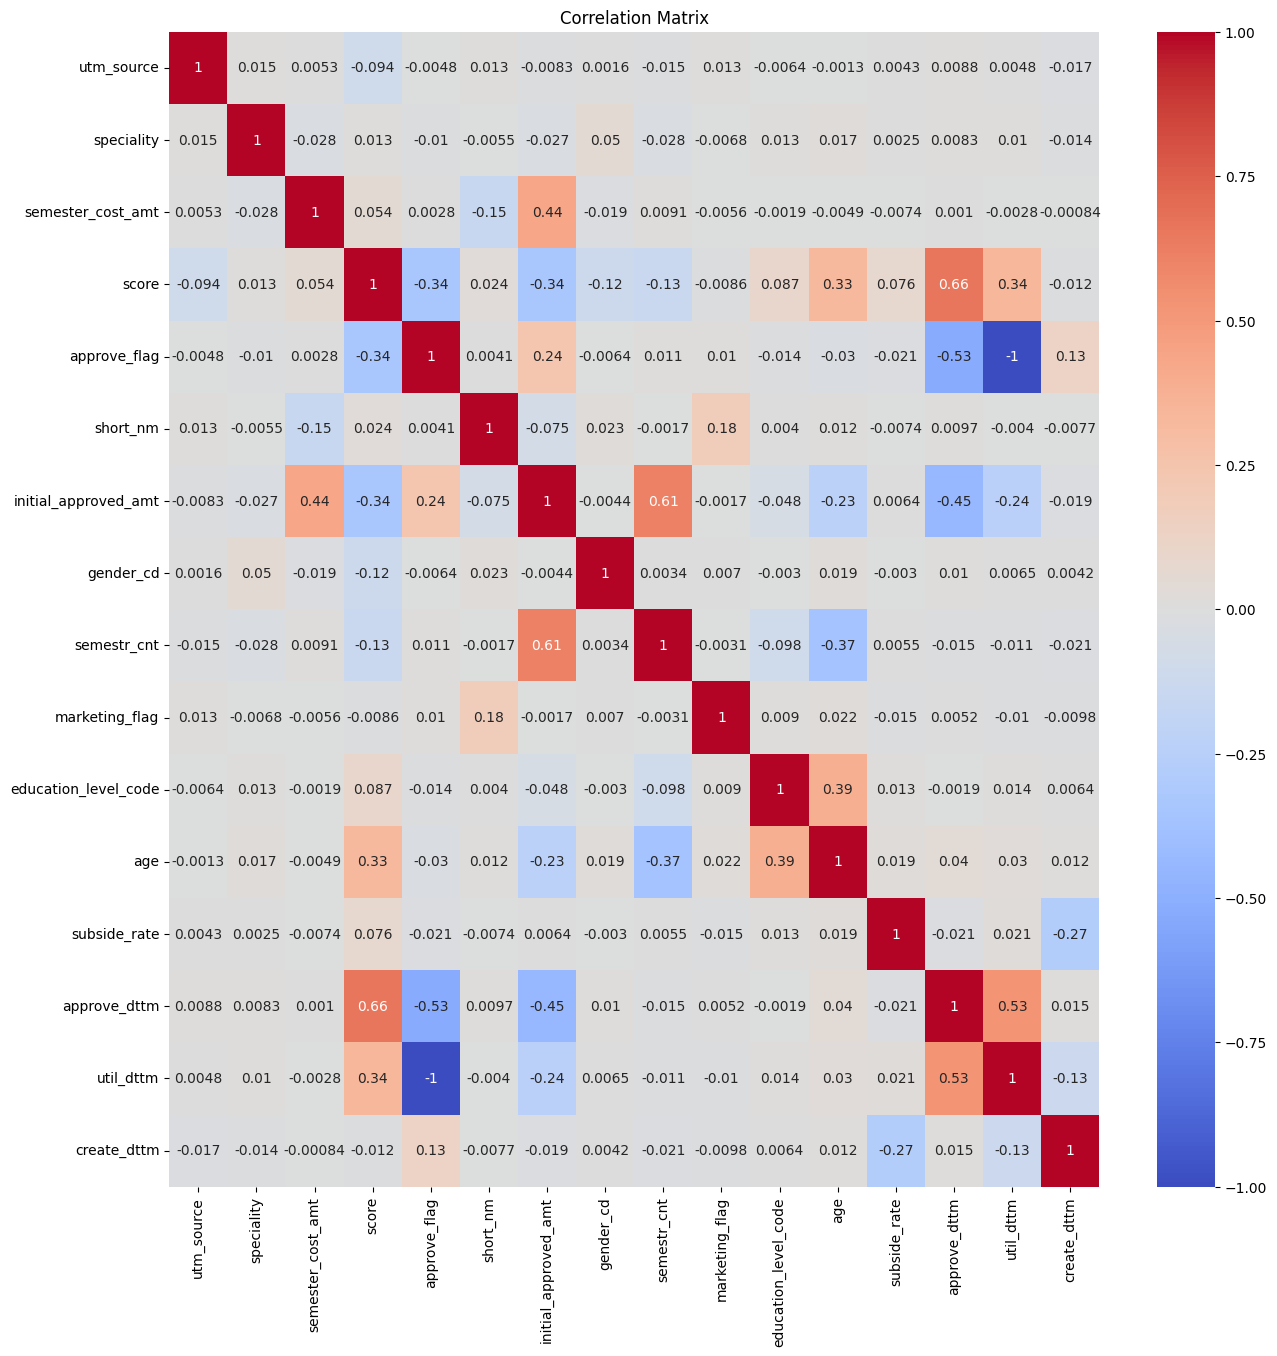

In [220]:
correlation_matrix = df_for_reg.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()